In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:

raw_dataset = pd.read_csv('parkinsons_updrs.data',
                          na_values = "?", comment = '\t',
                         sep = ",", skipinitialspace = True)

#raw_dataset = pd.DataFrame([raw_dataset.values], columns = column_names)
dataset = raw_dataset.copy()
dataset.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [11]:
# i cannot assign unique numbers to the string data because they are too much 90 Unique city


target = dataset.pop("total_UPDRS")
dataset.shape

(5875, 21)

In [12]:
bias = []
for i in range(5875):
    bias.append(1)
bias = np.asarray(bias)
dataset.insert (0, "bias", bias)
dataset

,bias,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,1,72,0,5.64310,28.199,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,1,72,0,12.66600,28.447,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,1,72,0,19.68100,28.695,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,1,72,0,25.64700,28.905,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,1,72,0,33.64200,29.187,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,1,72,0,40.65200,29.435,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,1,72,0,47.64900,29.682,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,1,72,0,54.64000,29.928,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,1,72,0,61.66900,30.177,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,1,72,0,68.68800,30.424,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


In [13]:
dataset.shape

(5875, 22)

In [14]:
dataset.to_csv('datafile.csv', header=False, index=False)
target.to_csv('target.csv', header=False, index=False)

In [15]:
dataset = pd.read_csv("datafile.csv")
target = pd.read_csv("target.csv")

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)

(4699, 22)
(4699, 1)


In [17]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
beta.shape

(9, 1)

In [18]:
def Gradient_fbeta(train,target,beta):
    X = np.transpose(train)
    Y = target
    B = beta    
    # using the gradient of beta function df(beta)/dbeta
    first = np.dot(train, B)
    second = target - first 
    second1 = X * -2
    grad = np.dot(second1, second)
    
    return grad

In [19]:
def function_fbeta(train,target,beta):
    X = np.transpose(train)
    Y = np.transpose(target)
    B = np.transpose(beta)
    first = np.dot(B,X)
    first = np.dot(first, train)
    first = np.dot(first, beta)
    second = Y * 2
    second = np.dot(second, train)
    second = np.dot(second, beta)
    third = np.dot(Y, target)
    final = (first - second) + third
    
    return final
    
    

In [20]:
def RMSE(new_beta, x_test, y_test):
    pred = np.dot(x_test, new_beta)
    sq_loss = (np.subtract(y_test, pred))**2
    sq_loss = np.mean(sq_loss)
    Rmse = np.sqrt(sq_loss)
    
    return Rmse

# For learn-linregDG and Minimize_GD

In [21]:
def minimize_GD(beta, train, target, learn_rate, epoch, x_test, y_test):
    diff = []
    count = []
    Rmse = [] 
    for i in range(epoch):
        new_beta = beta - (learn_rate * Gradient_fbeta(train, target, beta))
        diff.append(function_fbeta(train,target,beta) - function_fbeta(train,target,new_beta))
        count.append(i)
        Rmse.append(RMSE(new_beta, x_test, y_test))
        beta = new_beta
            
    return new_beta, diff, count, Rmse
            
        

In [22]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
def learn_linregGD(train, target, beta, learn_rate, epoch, x_test, y_test):
    X = train
    Y = target
    B = beta
    Beta, diff, itr, Rmse = minimize_GD(B, X, Y,learn_rate, epoch, x_test, y_test ) 
    
     
       
    return Beta, diff, itr, Rmse

In [23]:
lrate = 0.01
epoch = 10

model, diff, itr, Rmse = learn_linregGD(x_train, y_train, beta, lrate, epoch, x_test, y_test)
model

ValueError: shapes (4699,22) and (9,1) not aligned: 22 (dim 1) != 9 (dim 0)

In [223]:
Rmse = np.asarray(Rmse)
print(Rmse)

[[4.39239657e+09]
 [8.78479327e+09]
 [1.31771900e+10]
 [1.75695867e+10]
 [2.19619834e+10]
 [2.63543801e+10]
 [3.07467768e+10]
 [3.51391735e+10]
 [3.95315702e+10]
 [4.39239669e+10]
 [4.83163636e+10]
 [5.27087603e+10]
 [5.71011570e+10]
 [6.14935537e+10]
 [6.58859504e+10]
 [7.02783471e+10]
 [7.46707438e+10]
 [7.90631405e+10]
 [8.34555372e+10]
 [8.78479340e+10]
 [9.22403307e+10]
 [9.66327274e+10]
 [1.01025124e+11]
 [1.05417521e+11]
 [1.09809917e+11]
 [1.14202314e+11]
 [1.18594711e+11]
 [1.22987108e+11]
 [1.27379504e+11]
 [1.31771901e+11]
 [1.36164298e+11]
 [1.40556694e+11]
 [1.44949091e+11]
 [1.49341488e+11]
 [1.53733885e+11]
 [1.58126281e+11]
 [1.62518678e+11]
 [1.66911075e+11]
 [1.71303471e+11]
 [1.75695868e+11]
 [1.80088265e+11]
 [1.84480661e+11]
 [1.88873058e+11]
 [1.93265455e+11]
 [1.97657852e+11]
 [2.02050248e+11]
 [2.06442645e+11]
 [2.10835042e+11]
 [2.15227438e+11]
 [2.19619835e+11]
 [2.24012232e+11]
 [2.28404628e+11]
 [2.32797025e+11]
 [2.37189422e+11]
 [2.41581819e+11]
 [2.459742

In [224]:
diff = np.asarray(diff)
diff = diff.reshape(110,1)

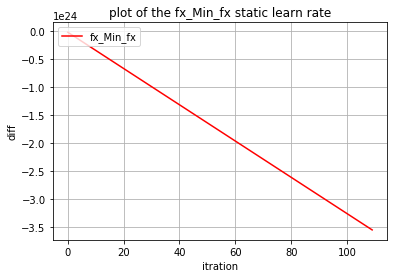

In [225]:
plt.plot(itr,diff, "r" ,label = "fx_Min_fx")
plt.title("plot of the fx_Min_fx static learn rate")
plt.xlabel("itration")
plt.ylabel("diff")
plt.legend(loc="upper left")
plt.grid()
plt.show()

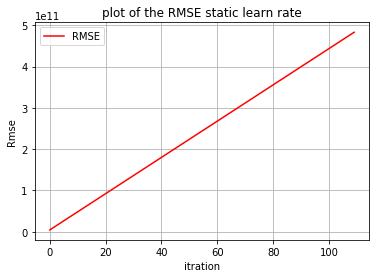

In [226]:
plt.plot(itr,Rmse, "r" ,label = "RMSE")
plt.title("plot of the RMSE static learn rate")
plt.xlabel("itration")
plt.ylabel("Rmse")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Part B backtracking and steplength - bolddriver

In [227]:
def stepsize_backtracking(function_x, gradient_x, train, target,lrt, beta, R_factor):
    mew = 1
    while function_x(train,target,(beta - (mew * (gradient_x(train,target,beta))))) > function_x(train,target,beta) - lrt * mew * np.dot(np.transpose(gradient_x(train,target,beta)), gradient_x(train,target,beta)):
        mew_new  = R_factor * mew
        mew = mew_new
                                                       
    return mew
                                                       

In [228]:
def steplength_bolddriver(function_x, gradient_x, train, target,lrt, beta, R_factor):
    mew = lrt * 1.1
    while function_x(train,target,beta) - function_x(train,target, (beta + (mew * -(gradient_x(train,target,beta)))))<= 0:
        mew_new = mew * R_factor
        mew = mew_new
    return mew

In [229]:
def minimize_GD2(gradient, beta, train, target, learn_rate, epoch, x_test, y_test, adaptive_lr, R_factor):
    diff = []
    count = []
    Rmse = [] 
    for i in range(epoch):
        learn_rate1 = adaptive_lr(function_fbeta, Gradient_fbeta, train, target,learn_rate, beta, R_factor)
        new_beta = beta - (learn_rate1 * gradient)
        diff.append(function_fbeta(train,target,beta) - function_fbeta(train,target,new_beta))
        count.append(i)
        Rmse.append(RMSE(new_beta, x_test, y_test))
        beta = new_beta
        learn_rate = learn_rate1    
    return new_beta, diff, count, Rmse

In [230]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
def learn_linregGD2(train, target, beta, learn_rate, epoch, x_test, y_test,adaptive_lr, R_factor):
    X = train
    Y = target
    B = beta
    Beta, diff, itr, Rmse =minimize_GD2(Gradient_fbeta(X,Y,beta),B,X,Y,learn_rate, epoch,x_test,y_test, adaptive_lr, R_factor) 
    
     
       
    return Beta, diff, itr, Rmse

In [239]:
lrate = 0.01
epoch = 100
R_factor = 0.5
model, diff, itr, Rmse = learn_linregGD2(x_train, y_train, beta, lrate, epoch, x_test, y_test,steplength_bolddriver, R_factor)
model

array([[9.95989328e-03],
       [1.79342366e+00],
       [1.18505101e+01],
       [6.26341734e+00],
       [4.90652618e-02],
       [5.79320427e-01],
       [1.83766231e+00],
       [4.79494419e-02],
       [3.21689490e-01]])

In [240]:
Rmse = np.asarray(Rmse)
print(Rmse)

[[   58.25702651]
 [  175.15198779]
 [  344.4493314 ]
 [  534.35376179]
 [  744.28648372]
 [  975.65532274]
 [ 1230.39369359]
 [ 1370.55620775]
 [ 1524.76455858]
 [ 1694.41973906]
 [ 1881.06335471]
 [ 2086.39159717]
 [ 2312.27063266]
 [ 2560.75354297]
 [ 2697.42465999]
 [ 2847.76656009]
 [ 3013.1464256 ]
 [ 3195.06813436]
 [ 3395.1859282 ]
 [ 3615.31944873]
 [ 3857.47027738]
 [ 3990.65473612]
 [ 4137.15871729]
 [ 4298.31426562]
 [ 4475.58663005]
 [ 4670.58758276]
 [ 4885.09006998]
 [ 5121.04432792]
 [ 5380.59561025]
 [ 5523.34944689]
 [ 5680.37913375]
 [ 5853.11230824]
 [ 6043.11937412]
 [ 6252.12777752]
 [ 6482.03771063]
 [ 6734.93938551]
 [ 6874.03561068]
 [ 7027.0416882 ]
 [ 7195.34863379]
 [ 7380.48656731]
 [ 7584.13862307]
 [ 7808.15625114]
 [ 8054.57604864]
 [ 8190.10710539]
 [ 8339.19139687]
 [ 8503.18426539]
 [ 8683.57658956]
 [ 8882.0083379 ]
 [ 9100.28347788]
 [ 9340.38637574]
 [ 9604.49983628]
 [ 9749.76235333]
 [ 9909.55120996]
 [10085.31905351]
 [10278.66379765]
 [10491.34

In [242]:
diff = np.asarray(diff)
diff = diff.reshape(100,1)

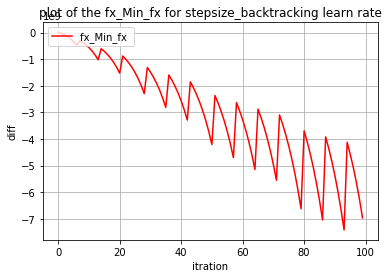

In [243]:
plt.plot(itr,diff, "r" ,label = "fx_Min_fx ")
plt.title("plot of the fx_Min_fx for stepsize_backtracking learn rate")
plt.xlabel("itration")
plt.ylabel("diff")
plt.legend(loc="upper left")
plt.grid()
plt.show()

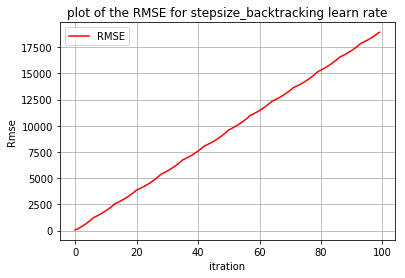

In [244]:
plt.plot(itr,Rmse, "r" ,label = "RMSE")
plt.title("plot of the RMSE for stepsize_backtracking learn rate")
plt.xlabel("itration")
plt.ylabel("Rmse")
plt.legend(loc="upper left")
plt.grid()
plt.show()